# Predicting Seattle Collisions

In [74]:
# importing libraries
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
# loading the data set
filepath = 'data/'
df = pd.read_csv(filepath + 'Collisions.csv')

In [76]:
# shape
df.shape

(203190, 40)

In [77]:
# number of null values
df.isna().sum()

X                    5216
Y                    5216
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3588
INTKEY             137759
LOCATION             4392
EXCEPTRSNCODE      120404
EXCEPTRSNDESC      193083
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       23113
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        10858
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     175560
UNDERINFL           23011
WEATHER             23179
ROADCOND            23126
LIGHTCOND           23271
PEDROWNOTGRNT      198362
SDOTCOLNUM          75985
SPEEDING           194002
ST_COLCODE           9493
ST_COLDESC          23113
SEGLANEKEY              0
CROSSWALKKEY

In [78]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [79]:
df_counts = df[['OBJECTID', 'INCDATE']].groupby('INCDATE').count()
len(df_counts) / 365

14.865753424657534

In [80]:
df_counts.describe()

,OBJECTID
count,5426.000000
mean,37.447475
std,10.613039
min,1.000000
25%,30.000000
50%,37.000000
75%,44.000000
max,103.000000


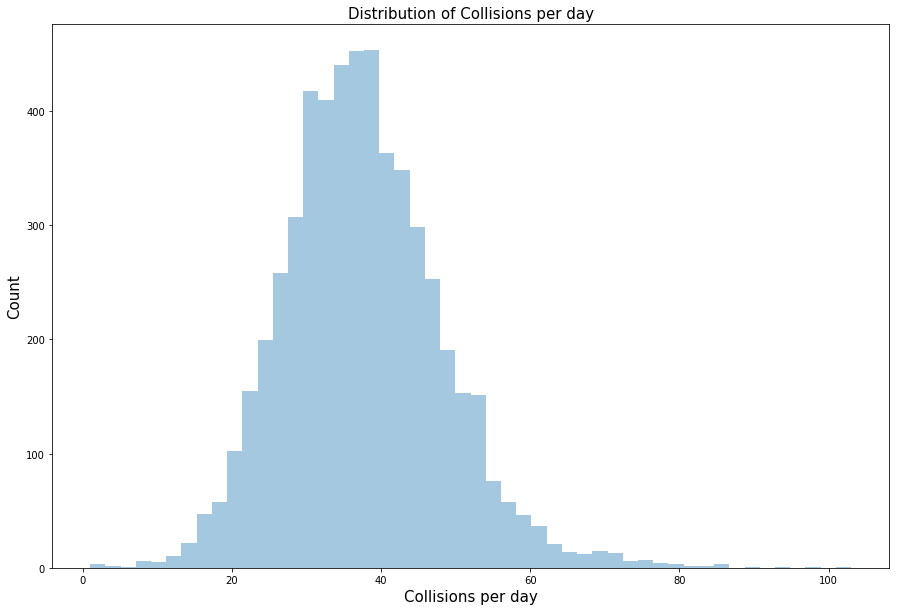

In [81]:
# distribution plot
plt.figure(figsize=(15,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Collisions per day', fontsize=15)
plt.title('Distribution of Collisions per day', fontsize=15)
sns.distplot(df_counts, kde=False)

In [82]:
df.columns.values

array(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'], dtype=object)

In [83]:
# distribution of numeric data
numeric_columns = ['PERSONCOUNT',
                   'PEDCOUNT',
                   'PEDCYLCOUNT',
                   'VEHCOUNT', 
                   'INJURIES',
                   'SERIOUSINJURIES', 
                   'FATALITIES']
categorical_columns = ['STATUS',
                       'ADDRTYPE',
                       'SEVERITYCODE',
                       'COLLISIONTYPE',
                       'JUNCTIONTYPE',
                       'INATTENTIONIND',
                       'UNDERINFL', 
                       'WEATHER', 
                       'ROADCOND', 
                       'LIGHTCOND', 
                       'PEDROWNOTGRNT', 
                       'SPEEDING',
                       'HITPARKEDCAR']
encode_columns = ['WEATHER', 
                  'ROADCOND',
                  'LIGHTCOND',
                  'COLLISIONTYPE',
                  'JUNCTIONTYPE']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d215c18>,
      dtype=object)

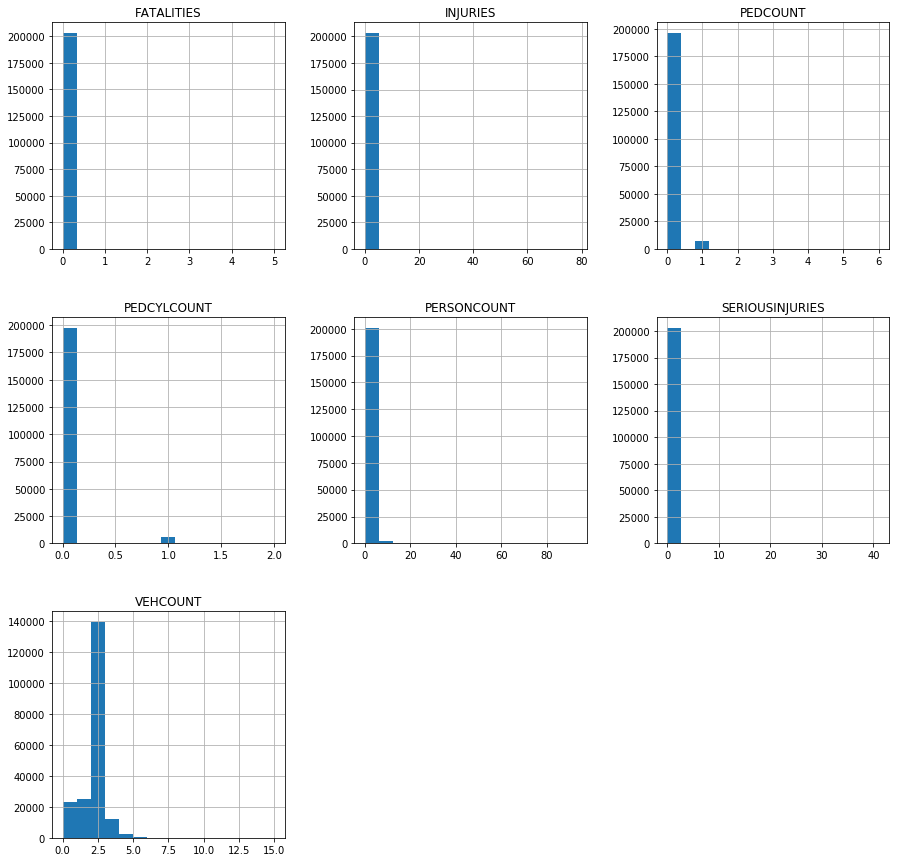

In [84]:
df[numeric_columns].hist(layout=(3,3), figsize=(15,15), bins=15)

In [85]:
# # pairplot of numeric data
# sns.pairplot(data=df, vars=numeric_columns, palette='husl')

In [86]:
# counts of categorical columns
for column in categorical_columns:
    print(df[column].value_counts(), '\n')

Matched      180232
Unmatched     22958
Name: STATUS, dtype: int64 

Block           133367
Intersection     65431
Alley              804
Name: ADDRTYPE, dtype: int64 

1     127003
2      53786
0      19253
2b      2835
3        312
Name: SEVERITYCODE, dtype: int64 

Parked Car    45574
Angles        32487
Rear Ended    32106
Other         22770
Sideswipe     17243
Left Turn     12996
Pedestrian     7008
Cycles         5112
Right Turn     2790
Head On        1991
Name: COLLISIONTYPE, dtype: int64 

Mid-Block (not related to intersection)              92348
At Intersection (intersection related)               62859
Mid-Block (but intersection related)                 23641
Driveway Junction                                    10915
At Intersection (but not related to intersection)     2362
Ramp Junction                                          188
Unknown                                                 19
Name: JUNCTIONTYPE, dtype: int64 

Y    27630
Name: INATTENTIONIND, dtype: int64 


In [95]:
df = df.dropna(subset=['LIGHTCOND'])

In [96]:
df_day = df[df.LIGHTCOND == 'Daylight']
df_day_count = df_day[['OBJECTID', 'INCDATE']].groupby('INCDATE').count().reset_index()

In [100]:
df_day_count['date'] = pd.to_datetime(df_day_count.INCDATE)
df_day_count.set_index('date', inplace=True)

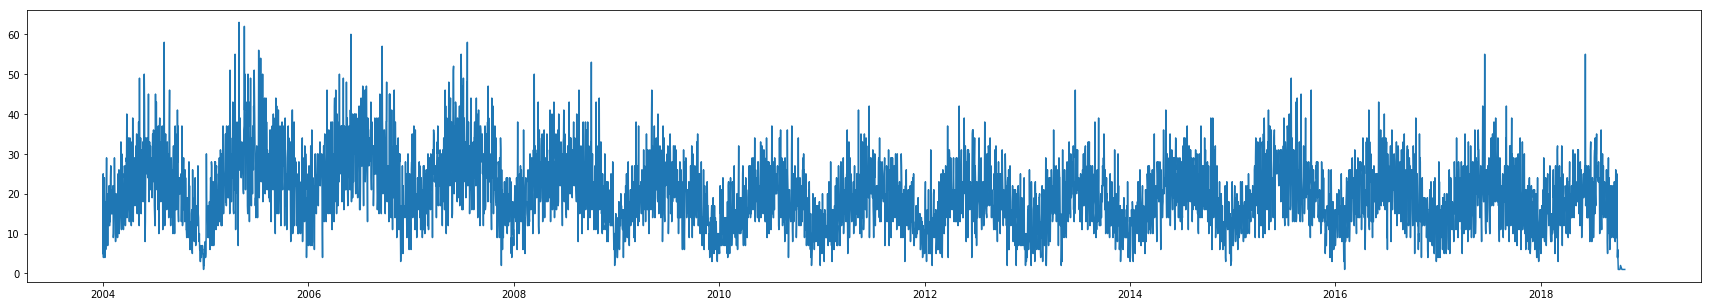

In [101]:
plt.figure(figsize=(30,5))
plt.plot(df_day_count.OBJECTID)

In [102]:
df_dark = df[df.LIGHTCOND.str.contains('Dark')]
df_dark_count = df_dark[['OBJECTID', 'INCDATE']].groupby('INCDATE').count().reset_index()

In [105]:
df_dark_count['date'] = pd.to_datetime(df_dark_count.INCDATE)
df_dark_count.set_index('date', inplace=True)

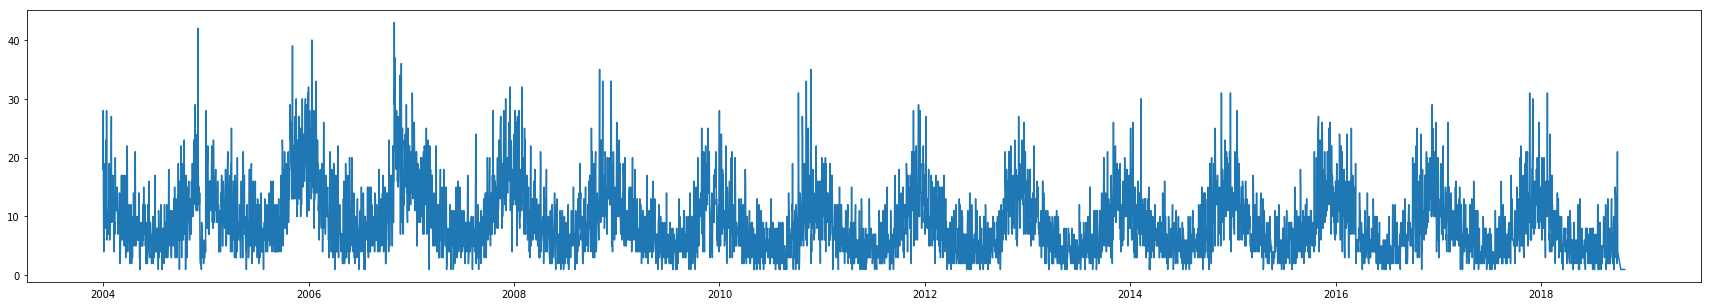

In [106]:
plt.figure(figsize=(30,5))
plt.plot(df_dark_count.OBJECTID)

In [14]:
df.LOCATION.value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          292
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          288
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                288
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          261
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                254
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          250
6TH AVE AND JAMES ST                                                                    244
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   235
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              225
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N                                              200
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB O

In [15]:
light_df = df.groupby('LIGHTCOND').count()

In [16]:
light_df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,WEATHER,ROADCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
LIGHTCOND,,,,,,,,,,,,,,,,,,,,,
Dark - No Street Lights,1376,1376,1440,1440,1440,1440,1440,1431,295,1382,...,1438,1440,25,931,123,1439,1439,1440,1440,1440
Dark - Street Lights Off,1128,1128,1156,1156,1156,1156,1156,1148,341,1133,...,1152,1154,35,769,86,1156,1156,1156,1156,1156
Dark - Street Lights On,45474,45474,46008,46008,46008,46008,46008,45808,15249,45650,...,45965,45991,1226,30531,4007,46000,45999,46008,46008,46008
Dawn,2324,2324,2356,2356,2356,2356,2356,2345,860,2338,...,2356,2356,116,1454,187,2355,2355,2356,2356,2356
Daylight,108525,108525,110014,110014,110014,110014,110014,109359,40051,109002,...,109979,109995,3157,70405,4396,109929,109928,110014,110014,110014


In [17]:
grouped_df = df.groupby(['INCDATE', 
                         'ROADCOND',
                         'LIGHTCOND'])['OBJECTID'].count().reset_index()

In [18]:
grouped_df = pd.DataFrame(grouped_df)
grouped_df

,INCDATE,ROADCOND,LIGHTCOND,OBJECTID
0,2004-01-01T00:00:00.000Z,Dry,Dark - Street Lights On,4
1,2004-01-01T00:00:00.000Z,Dry,Daylight,2
2,2004-01-01T00:00:00.000Z,Ice,Dark - Street Lights On,2
3,2004-01-01T00:00:00.000Z,Ice,Dawn,1
4,2004-01-01T00:00:00.000Z,Snow/Slush,Unknown,1
5,2004-01-01T00:00:00.000Z,Wet,Dark - Street Lights On,12
6,2004-01-01T00:00:00.000Z,Wet,Daylight,3
7,2004-01-01T00:00:00.000Z,Wet,Unknown,1
8,2004-01-02T00:00:00.000Z,Dry,Dark - No Street Lights,1
9,2004-01-02T00:00:00.000Z,Dry,Dark - Street Lights On,5


In [19]:
num_train = round(len(grouped_df) * 0.7)

In [20]:
train_df = grouped_df.head(num_train)
test_df = grouped_df.tail(grouped_df.shape[0] - num_train)

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_formula = 'OBJECTID ~ ROADCOND + LIGHTCOND'
nbm = smf.glm(formula=model_formula, family=sm.families.NegativeBinomial(), data=train_df).fit()

In [22]:
test_df['preds'] = round(nbm.predict(test_df)).astype(int)
test_df = test_df.reset_index()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
test_df = test_df.drop('index', axis=1)

In [35]:
actual = test_df[['INCDATE', 'OBJECTID']].groupby('INCDATE').sum().reset_index()
preds = test_df[['INCDATE', 'preds']].groupby('INCDATE').sum().reset_index()

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

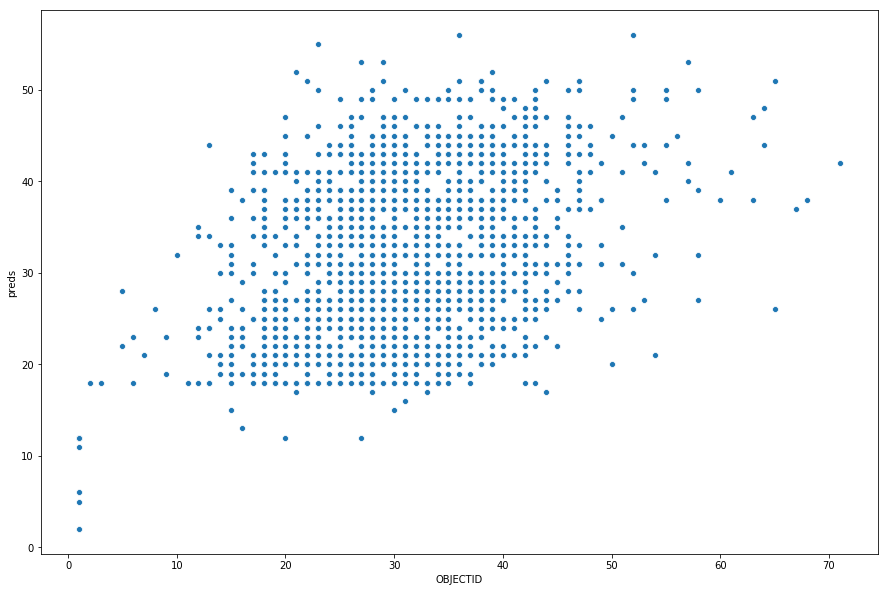

In [53]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = actual.OBJECTID, y = preds.preds)
test_df.corr()

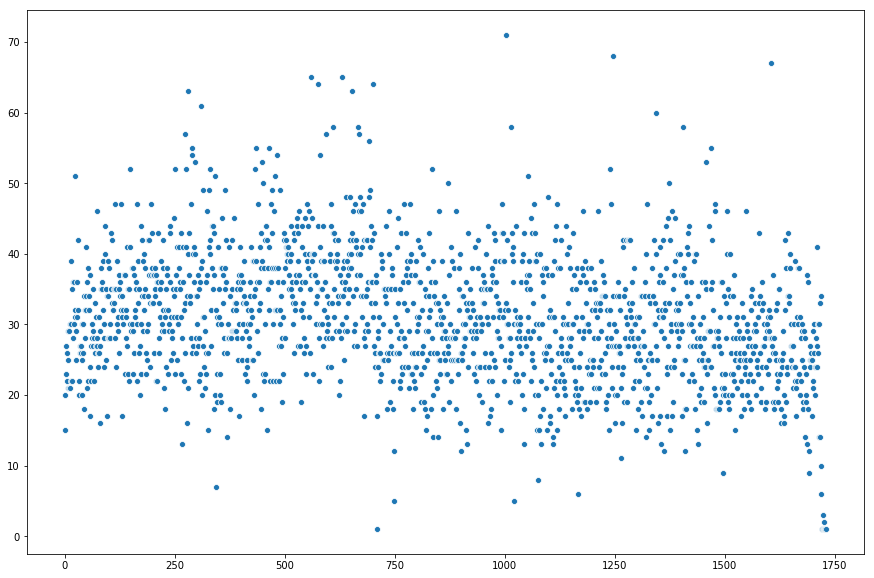

In [58]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=actual.OBJECTID)

# Getting the weather data

In [ ]:
df = df.dropna(subset=['X', 'Y'])

In [46]:
from weather import Weather, Unit

# accepts latitude, longitude and date in format of dd mmm yyyy e.g. 05 Dec 2018 and returns the weather condition
def get_weather(latitude, longitude, date):
    weather = Weather(unit=Unit.CELSIUS)
    lookup = weather.lookup_by_latlng(latitude, longitude)
    condition = lookup.condition
    forecasts = lookup.forecast
    for forecast in forecasts:
        if (forecast.date == date):
            return [forecast.text, forecast.high, forecast.low]

In [50]:
df.head(1).X

0   -122.33946
Name: X, dtype: float64

In [51]:
# testing function
get_weather(df.head(1).X.values[0], df.head(1).Y.values[0], "05 Dec 2018")

AttributeError: 'NoneType' object has no attribute 'condition'